In [1]:
# This code allows us to use PySpark in Jupyter Notebook
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration-4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/23 18:41:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
### 01-BU
# The data mining objective is to explore the relationship between lung cancer and factors studied in the data,
# and to identify the key factors or features that significantly increase the risk of getting lung cancer.

In [2]:
### 02-DU

# Load the csv file "Pesticide and Lung Cancer 1"
LC_1 = spark.read.csv('Pesticide and Lung Cancer 1.csv', header=True, inferSchema=True)
display(LC_1.toPandas().head(10))

In [ ]:
# Summary Stats
LC_1_Summary=LC_1.describe()
display(LC_1_Summary.toPandas().head())

In [ ]:
# Bar plot
import matplotlib.pyplot as plt

lung_ca_counts = LC_1.groupBy("LungCA").count()
lung_ca_counts.show()

lung_ca_counts_pd = lung_ca_counts.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(lung_ca_counts_pd['LungCA'], lung_ca_counts_pd['count'], color='blue')
plt.xlabel('LungCA')
plt.ylabel('Count')
plt.title('Count of LungCA Categories')
plt.show()

In [ ]:
# Bar plot
import matplotlib.pyplot as plt

CigSmoke_counts = LC_1.groupBy("CigSmoke").count()
CigSmoke_counts.show()

CigSmoke_counts_pd = CigSmoke_counts.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(CigSmoke_counts_pd['CigSmoke'], CigSmoke_counts_pd['count'], color='blue')
plt.xlabel('CigSmoke')
plt.ylabel('Count')
plt.title('Count of CigSmoke Categories')
plt.show()

In [3]:
# Load the csv file "Pesticide and Lung Cancer 2"
LC_2 = spark.read.csv('Pesticide and Lung Cancer 2.csv', header=True, inferSchema=True)
display(LC_2.toPandas().head(10))

In [ ]:
# Summary Stats
LC_2_Summary=LC_2.describe()
display(LC_2_Summary.toPandas().head())

In [ ]:
# Bar plot for Herbicides
import matplotlib.pyplot as plt

Herbicides_counts = LC_2.groupBy("Herbicides").count()
Herbicides_counts_pd = Herbicides_counts.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(Herbicides_counts_pd['Herbicides'], Herbicides_counts_pd['count'], color='blue')
plt.xlabel('Herbicides')
plt.ylabel('Count')
plt.title('Count of Herbicides Categories')
plt.show()

# Bar plot for Insecticides

Insecticides_counts = LC_2.groupBy("Insecticides").count()
Insecticides_counts_pd = Insecticides_counts.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(Insecticides_counts_pd['Insecticides'], Insecticides_counts_pd['count'], color='blue')
plt.xlabel('Insecticides')
plt.ylabel('Count')
plt.title('Count of Insecticides Categories')
plt.show()

# Bar plot for Fungicides

Fungicides_counts = LC_2.groupBy("Fungicides").count()
Fungicides_counts_pd = Fungicides_counts.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(Fungicides_counts_pd['Fungicides'], Fungicides_counts_pd['count'], color='blue')
plt.xlabel('Fungicides')
plt.ylabel('Count')
plt.title('Count of Fungicides Categories')
plt.show()


In [ ]:
# Variable type for LC_1
LC_1.printSchema()

In [ ]:
# Variable type for LC_2
LC_2.printSchema()

In [4]:
# Change data type to integer for LC_2
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)
data_schema = [StructField('ID',IntegerType(),True),
              StructField('Herbicides',IntegerType(),True),
              StructField('Herbicides_year',IntegerType(),True),
              StructField('Herbicides_year_group',IntegerType(),True),
              StructField('Herbicides_day',IntegerType(),True),
              StructField('Herbicides_day_group',IntegerType(),True),
              StructField('Insecticides',IntegerType(),True),
              StructField('Insecticides_year',IntegerType(),True),
              StructField('Insecticides_year_group',IntegerType(),True),
              StructField('Insecticides_day',IntegerType(),True),
              StructField('Insecticides_day_group',IntegerType(),True),
              StructField('Fungicides',IntegerType(),True),
              StructField('Fungicides_year',IntegerType(),True),
              StructField('Fungicides_year_group',IntegerType(),True),
              StructField('Fungicides_day',IntegerType(),True),
              StructField('Fungicides_day_group',IntegerType(),True),
              StructField('Glyphosate_use',IntegerType(),True),
              StructField('Glyphosate_days',IntegerType(),True),
              StructField('Paraquat_use',IntegerType(),True),
              StructField('Paraquat_days',IntegerType(),True),
              StructField('two_four_Dichlorophenoxy_use',IntegerType(),True),
              StructField('two_four_Dichlorophenoxy_days',IntegerType(),True),
              StructField('Butachlor_use',IntegerType(),True),
              StructField('Butachlor_Days',IntegerType(),True),
              StructField('Propanil_use',IntegerType(),True),
              StructField('Propanil_days',IntegerType(),True),
              StructField('Alachlor_use',IntegerType(),True),
              StructField('Alachlor_days',IntegerType(),True),
              StructField('Endosalfan_use',IntegerType(),True),
              StructField('Endosalfan_days',IntegerType(),True),
              StructField('Dieldrin_use',IntegerType(),True),
              StructField('Dieldrin_days',IntegerType(),True),
              StructField('DDT_use',IntegerType(),True),
              StructField('DDT_days',IntegerType(),True),
              StructField('Chlorpylifos_use',IntegerType(),True),
              StructField('Chlorpylifos_days',IntegerType(),True),
              StructField('Folidol_use',IntegerType(),True),
              StructField('Folidol_days',IntegerType(),True),
              StructField('Mevinphos_use',IntegerType(),True),
              StructField('Mevinphos_days',IntegerType(),True),
              StructField('Carbaryl_Savins_use',IntegerType(),True),
              StructField('Carbaryl_Savins_days',IntegerType(),True),
              StructField('Carbofuran_use',IntegerType(),True),
              StructField('Carbofuran_days',IntegerType(),True),
              StructField('Abamectin_use',IntegerType(),True),
              StructField('Abamectin_days',IntegerType(),True),
              StructField('Armure_Propiconazole_use',IntegerType(),True),
              StructField('Armure_Propiconazole_days',IntegerType(),True),
              StructField('Metal_aldehyde_use',IntegerType(),True),
              StructField('Metal_aldehyde_days',IntegerType(),True),
              StructField('Morphology_Group',IntegerType(),True),]

final_struct = StructType(fields=data_schema)
LC_2= spark.read.csv('Pesticide and Lung Cancer 2.csv', header=True, schema=final_struct)
LC_2.printSchema()

In [5]:
# LC_2 recognises null values
LC_2 = LC_2.replace(['', ' '], None)
display(LC_2.toPandas().head(10))

In [6]:
### 03-DP

# Drop irrelevant columns
LC_1 = LC_1.drop("Status", "Education", "Residency", "CigSmoke_status")
LC_2 = LC_2.drop("Morphology_Group")

In [7]:
# Drop erroneous rows
LC_1 = LC_1.filter(~LC_1.ID.isin(403,417,560))
LC_2 = LC_2.filter(~LC_2.ID.isin(403,417,560))

In [8]:
# Fill all null values with 0 for LC_2
LC_2=LC_2.na.fill(0)
display(LC_2.toPandas().head(10))

In [ ]:
# Outliers for LC_1 Cigarette_number
LC_1.select("Cigarette_number").describe().show()

In [ ]:
# Show outliers
out = LC_1.filter(LC_1['Cigarette_number'] > 26)
out.show()

In [9]:
# Coerce outlier values to 26
from pyspark.sql.functions import when
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 550, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 558, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 601, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 608, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 610, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 627, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 628, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 643, 26).otherwise(LC_1["Cigarette_number"]))
LC_1 = LC_1.withColumn("Cigarette_number", when(LC_1["ID"] == 676, 26).otherwise(LC_1["Cigarette_number"]))

In [10]:
# Construct new variable Cig_Total_Num
LC_1=LC_1.withColumn('Cig_Total_Num',LC_1['Cigarette_number']*LC_1['Cigarette_year']*300)

In [11]:
# Combine 2 datasets
LC_2 = LC_2.drop("ID")


from pyspark.sql.functions import monotonically_increasing_id
LC_1 = LC_1.withColumn("index", monotonically_increasing_id())
LC_2 = LC_2.withColumn("index", monotonically_increasing_id())
LC = LC_1.join(LC_2, "index").drop("index")

display(LC.toPandas().head(10))

In [12]:
# Change column orders
new_col_order=['ID', 'LungCA', 'Gender', 'Age', 'Age_group', 'Occupation', 'Distances',
       'Cooking_fume', 'Air_Pollution_Exposure', 'CigSmoke', 'Cigarette_year',
       'Cigarette_number', 'Cig_Total_Num', 'Herbicides', 'Herbicides_year',
       'Herbicides_year_group', 'Herbicides_day', 'Herbicides_day_group',
       'Insecticides', 'Insecticides_year', 'Insecticides_year_group',
       'Insecticides_day', 'Insecticides_day_group', 'Fungicides',
       'Fungicides_year', 'Fungicides_year_group', 'Fungicides_day',
       'Fungicides_day_group','Glyphosate_use', 'Glyphosate_days',
       'Paraquat_use', 'Paraquat_days', 'two_four_Dichlorophenoxy_use',
       'two_four_Dichlorophenoxy_days', 'Butachlor_use', 'Butachlor_Days',
       'Propanil_use', 'Propanil_days', 'Alachlor_use', 'Alachlor_days',
       'Endosalfan_use', 'Endosalfan_days', 'Dieldrin_use', 'Dieldrin_days',
       'DDT_use', 'DDT_days', 'Chlorpylifos_use', 'Chlorpylifos_days',
       'Folidol_use', 'Folidol_days', 'Mevinphos_use', 'Mevinphos_days',
       'Carbaryl_Savins_use', 'Carbaryl_Savins_days', 'Carbofuran_use',
       'Carbofuran_days', 'Abamectin_use', 'Abamectin_days',
       'Armure_Propiconazole_use', 'Armure_Propiconazole_days',
       'Metal_aldehyde_use', 'Metal_aldehyde_days']
LC_df = LC.select(new_col_order)

In [13]:
LC_df = LC_df.toPandas()

24/05/23 18:43:04 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [14]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [15]:
### 04-DT

# Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

LC_data = LC_df.iloc[:, 2:]
LC_target = LC_df['LungCA']
X, y = LC_data, LC_target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.08)
logreg.fit(X_train_scaled, y_train)

selected_features = [index for index, coef in enumerate(logreg.coef_[0]) if coef != 0]

print("Selected features:", selected_features)

accuracy = logreg.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Selected features: [1, 5, 9, 12, 13, 14, 33, 36, 37, 41, 42, 43, 45, 50, 53, 54]
Accuracy: 0.6838235294117647


In [16]:
# Selected features
print(LC_data.columns[[1, 5, 9, 12, 13, 14, 33, 36, 37, 41, 42, 43, 45, 50, 53, 54]])

Index(['Age', 'Cooking_fume', 'Cigarette_number', 'Herbicides_year',
       'Herbicides_year_group', 'Herbicides_day', 'Butachlor_Days',
       'Alachlor_use', 'Alachlor_days', 'Dieldrin_days', 'DDT_use', 'DDT_days',
       'Chlorpylifos_days', 'Carbaryl_Savins_use', 'Carbofuran_days',
       'Abamectin_use'],
      dtype='object')


<AxesSubplot:>

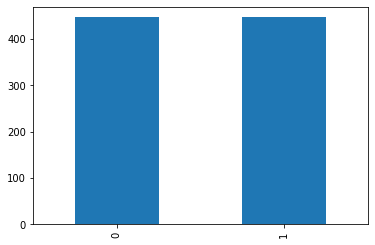

In [17]:
# Boosting uneven data
import pandas as pd
from sklearn.utils import resample
LC_df_NCA=LC_df[LC_df['LungCA']==0] 
LC_df_CA=LC_df[LC_df['LungCA']==1] 
LC_df_CA_boost=resample(LC_df_CA,replace=True,n_samples=len(LC_df_NCA))
LC_df_boosted=pd.concat([LC_df_NCA,LC_df_CA_boost])
LC_df_boosted['LungCA'].value_counts().plot.bar()

In [18]:
# Create target and attributes
LC_target=LC_df_boosted['LungCA']
LC_selected_data=LC_df_boosted[['Age', 'Cooking_fume', 'Cigarette_number', 'Herbicides_year',
       'Herbicides_year_group', 'Herbicides_day', 'Butachlor_Days',
       'Alachlor_use', 'Alachlor_days', 'Dieldrin_days', 'DDT_use', 'DDT_days',
       'Chlorpylifos_days', 'Carbaryl_Savins_use', 'Carbofuran_days',
       'Abamectin_use']]

In [19]:
# Transform Cig_Total_Num
LC_df_boosted['Cig_Total_Num'].value_counts().plot.bar()

import numpy as np
LC_df_boosted['Cig_Total_Num']=np.sqrt(LC_df_boosted['Cig_Total_Num'])

In [ ]:
### 05-DMM
# 'Supervised Learning-Classification'

In [ ]:
### 06-DMA

